Adrian deCola

HD Lab

PHYS 231

checked NL 1/3/21

In [ ]:
from google.colab import drive
from matplotlib import pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
import statistics as stats
import numpy as np
import pandas as pd
import os

In [ ]:
 # Mounting the drive
drive.mount('/content/drive')
data_dir = "/content/drive/MyDrive/deCola/HD Lab/Data"

Mounted at /content/drive


# Deriving an Expression for the Neutron Mass, $m_n$
First we can start with calculating the energy of an electron in a given energy level. An electron in the simplified Bohr model has both kinetic and electropotential energy. $$E_{net} = \frac{1}{2}m_ev^2 + (-k\frac{q_eq_p}{r})$$$$E_{net} = \frac{1}{2}m_ev^2-\frac{Ze^2}{4\pi \epsilon_0 r_n}$$Where $m_e$ is the mass of an electron, $Z$ is the atomic mass, and $\epsilon_0$ is the permittivity of free space. In the Bohr model these electrons are in circular motions. Therefore, $$F_c=m_ea_c$$Where $a_c=\frac{v^2}{r}$ Therefore, $$\frac{m_ev^2}{r_n}=\frac{Ze^2}{4 \pi \epsilon_0 r_n^2}$$ $${m_ev^2}=\frac{Ze^2}{4 \pi \epsilon_0 r_n}$$ $$E_{net} = \frac{1}{2}\frac{Ze^2}{4 \pi \epsilon_0 r_n}-\frac{Ze^2}{4\pi \epsilon_0 r_n}$$$$E_{net}=-\frac{Ze^2}{8\pi \epsilon_0 r_n}$$ It is clear that an electrons path around the neucleus must be a standing wave or it would interfere with itself. Bohrs assumption to deal with this quantum effect was that the possible angular momentums allowed are quantized. Therefore, $$rxp = m_evr_n = n\frac{h}{2\pi}$$$$v=\frac{nh}{2\pi r_n m_e}$$ Recall that ${m_ev^2}=\frac{Ze^2}{4 \pi \epsilon_0 r_n}$:
$$m_e \left( \frac{nh}{2\pi r_n m_e}\right)^2 = \frac{Ze^2}{4 \pi \epsilon_0 r_n}$$$$r_n = \frac{n^2h^2\epsilon_0}{Ze^2\pi m_e}$$ Plugging into this our equation for the possible allowed energy levels we get: $$E_n = \frac{-Ze^4m_e}{8 \epsilon_0^2h^2n^2}$$We will use this equation to calculate the emmision wavelengths of the Balmer Series of Hydrogen(but convert to a length by dividing by Planks constant). This equation is not completely correct as the electron does not rotate the neuclues but rather the center of mass. This can be corrected using the reduced mass of the electron: for Hydrogen, $\mu_H=\frac{m_em_p}{m_e + m_p}$ and for Deuterium, $\mu_D=\frac{m_e(m_p+m_n)}{m_e + m_p+m_n}$. It is clear that $$\lambda_H = \frac{\alpha}{\mu_H}$$where $\alpha = \frac{8\epsilon_o^2h^3c}{e^4}\left( \frac{1}{n_f^2}-\frac{1}{n_i^2}\right)=\lambda\mu_H$. Differentiating we get $$d\lambda=\alpha d\left(\frac{1}{\mu_H}\right)=\lambda\mu_Hd\left(\frac{1}{\mu_H}\right)$$We can approximate $d\lambda = \Delta \lambda$ and $d\left(\frac{1}{\mu_H}\right)=\Delta \left(\frac{1}{\mu_H}\right)$. 





















$$\frac{\Delta \lambda}{\lambda_H\mu_H}=\Delta \left(\frac{1}{\mu_H}\right)=\frac{1}{\mu_H} - \frac{1}{\mu_D}=\left( \frac{1}{m_e}+\frac{1}{m_p}\right) - \left( \frac{1}{m_e}+\frac{1}{m_D}\right)=\frac{1}{m_p}-\frac{1}{m_D}$$where $m_D=m_p+m_n$. $$\frac{\Delta \lambda}{\lambda_H}=\frac{m_em_p}{m_e + m_p}\left(\frac{1}{m_p}-\frac{1}{m_D}\right)$$It is known that $m_e<<m_p$, we can approximate that $m_e + m_p \approx m_p$.


 $$\frac{\Delta \lambda}{\lambda_H}=\frac{m_em_p}{m_p}\left(\frac{1}{m_p}-\frac{1}{m_D}\right)$$

 $$\frac{\Delta \lambda}{\lambda_H}=\frac{m_e}{m_p}-\frac{m_e}{m_D}$$

$$\frac{\Delta \lambda}{\lambda_H}=\frac{m_e}{m_p}-\frac{m_e}{m_p+m_n}$$

$$\frac{m_e}{m_p+m_n} = \frac{m_e}{m_p}-\frac{\Delta \lambda}{\lambda_H}=\frac{m_e \lambda_H - m_p\Delta \lambda}{m_P\lambda_H}$$

$$\frac{m_p+m_n}{m_e}=\frac{m_p\lambda_H}{m_e \lambda_H - m_p\Delta \lambda}$$


$$m_n = \frac{m_pm_e\lambda_H}{m_e \lambda_H - m_p\Delta \lambda}-m_p$$


This is the equation we will use to calculate the mass of the neutron. 

The uncertainty in this calculation, using error propogation, is $$\sigma_{m_n}=\frac{m_p^2m_e\lambda_H}{(m_e \lambda_H - m_p\Delta \lambda)^2}\sigma_{\Delta \lambda}$$

# Calculating the Difference in Wavelengths from the Data, $\Delta  \lambda$
To calculate the diffference in emmission wavelengths form Hydrogen and Deuterium, we can calculate the peak locations of the intensity/input voltage. It is clear that once we find the peaks locations, we must compare their indexes to the indexes of the marks we placed and the mark values. This ratio is is equal to the ratio of the wavelengths between the peaks and the marks. $$\frac{\Delta i}{\Delta I} = \frac{\Delta \lambda}{\Delta \Lambda}$$where $\Delta i $ is the difference in peak indexes, $\Delta I$ is the difference in mark indexes, $\Delta \lambda$ is the difference in peak wavelengths, or the difference in emmission wavelengths for Hydrogen and Deuterium, and $\Delta \Lambda$ is the difference in wavelengths of the marked points. Therefore to calculate the difference in peak wavelengths we calculate: $$\Delta \lambda = \frac{\Delta i \Delta \Lambda}{\Delta I}$$

During the experiment, there was lots of uncertainty from the marking the wavelengths, the grating would continue to turn making timing our marks a little difficult. We noticed it seemed most fitting to assume and uncertainty of one angstrom in each mark reading. Using error propogation: $$\sigma_{\Delta \lambda} = \frac{\Delta i}{\Delta I }\sigma_{\Delta \Lambda}$$
where the uncertainties in mark wavelengths add in quadrature: $\sigma_{\Delta \Lambda} = \sqrt{1^2 + 1^2} = \sqrt{2}$

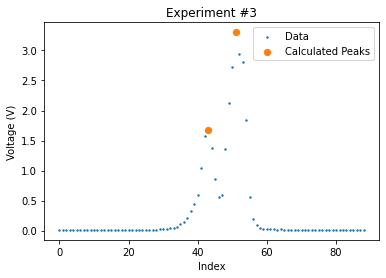

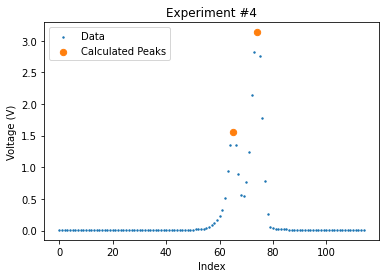

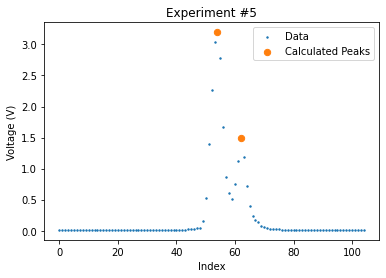

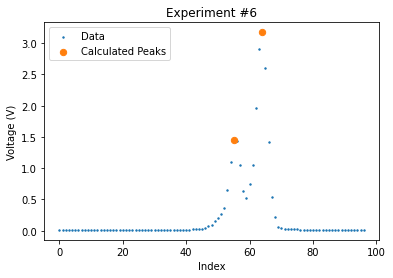

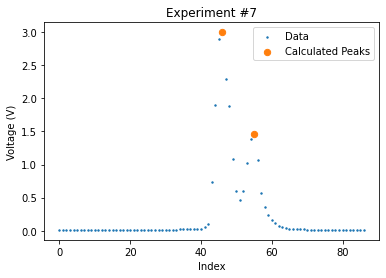

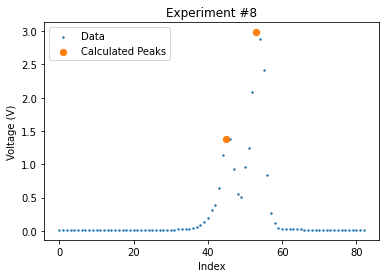

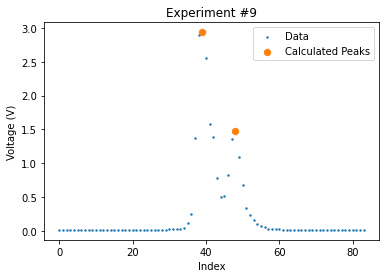

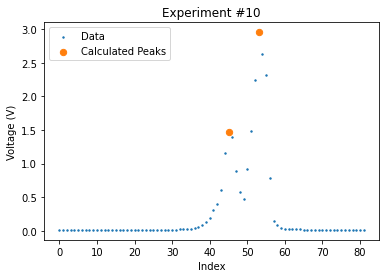

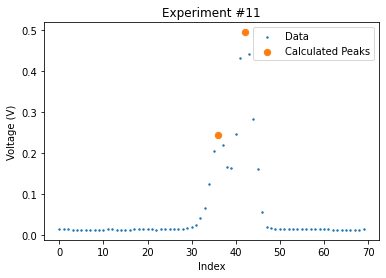

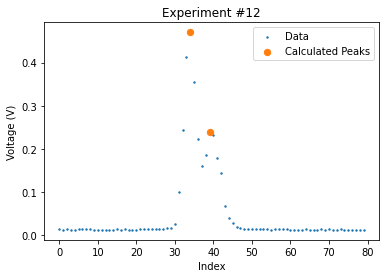

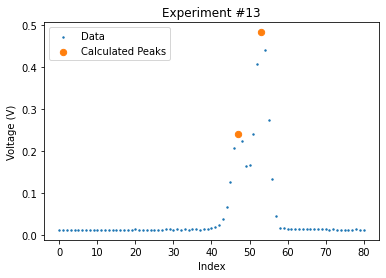

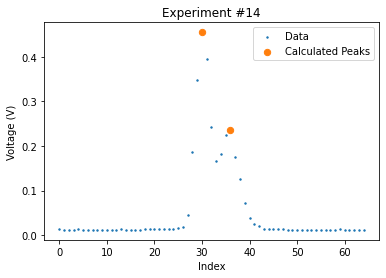

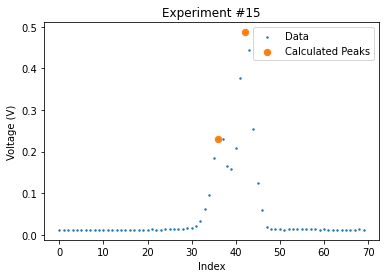

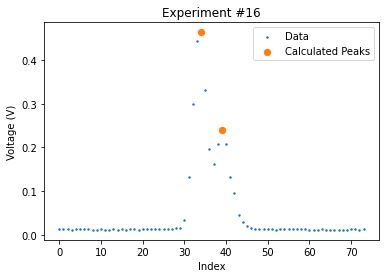

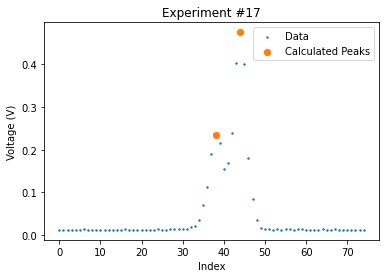

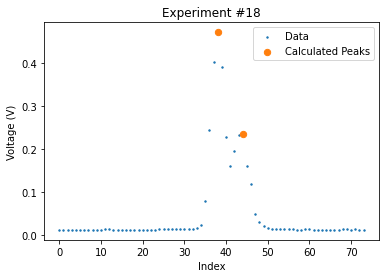

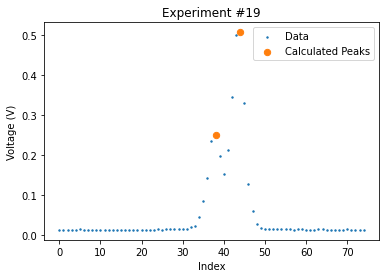

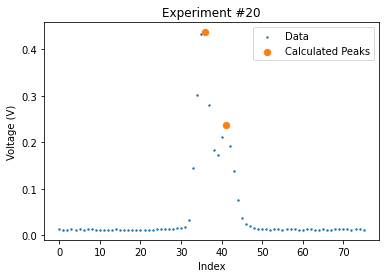

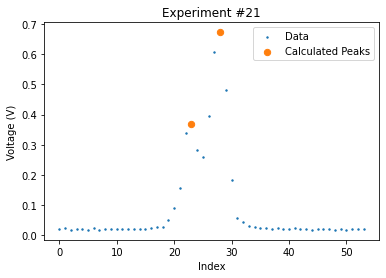

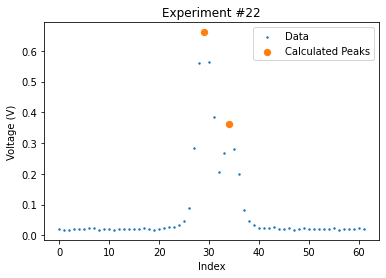

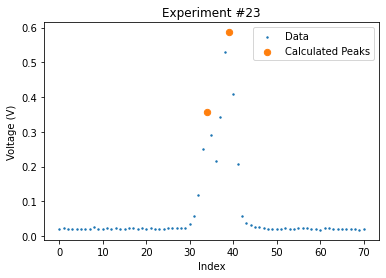

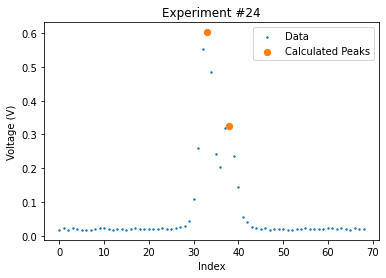

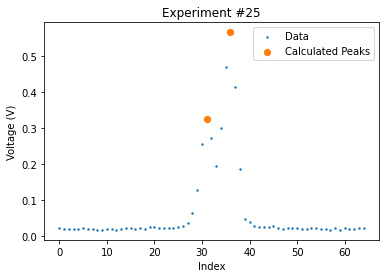

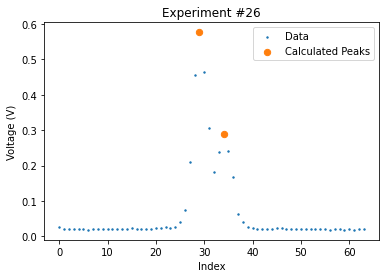

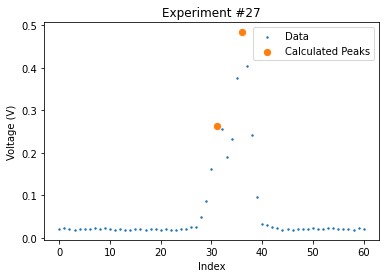

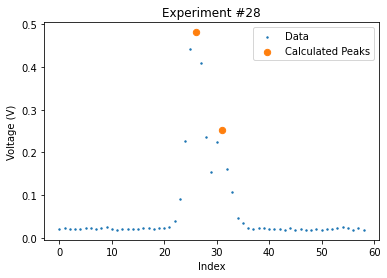

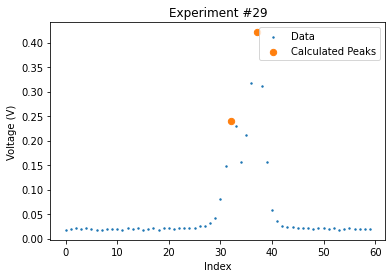

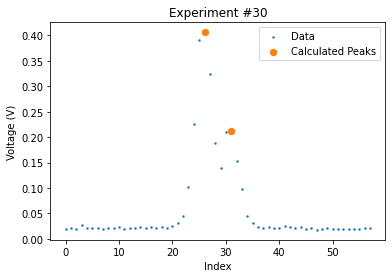

In [ ]:
delta_lambda = []
energy_levels_dropped = []
delta_lambda_unc = []

first_data_dir = data_dir + "/first"
second_data_dir = data_dir + "/second"
third_data_dir = data_dir + "/third"

k = 1
l = 1
for data_directory in [first_data_dir, second_data_dir, third_data_dir]:
  for file in os.listdir(data_directory):
    # converting data to pandas dataframe
    df = pd.read_csv(os.path.join(data_directory, file))
    # converting to numpy arrays
    marks = df.iloc[:,0].values
    voltage = df.iloc[:,1].values

    # finding the peak indexes
    peak_indexes = find_peaks(voltage, prominence = 0.05)[0]

    # only using data sets where data was clean enough to get only two peaks
    # (only drops the first experiment where we had not yet closed the curtain)
    # droping second experiment becuase it was also unreasonably noisy
    if len(peak_indexes) == 2 and l!= 2:

      # viewing the estimated peaks
      plt.scatter([i for i in range(len(marks))], voltage, s=2, label = "Data")
      plt.scatter(peak_indexes, [voltage[peak_indexes[i]] for i in range(len(peak_indexes))], s = 40, label = "Calculated Peaks")
      plt.legend()
      plt.title(f"Experiment #{l}")
      plt.xlabel("Index")
      plt.ylabel("Voltage (V)")
      plt.show()

      delta_peak_indexes = peak_indexes[1] - peak_indexes[0]

      # getting the change in mark indexes and mark wavelengths
      mark_indexes = []
      mark_wavelengths = []
      for i in range(len(marks)):
        if str(marks[i]) != 'nan':
          mark_indexes.append(i)
          mark_wavelengths.append(marks[i])

      delta_mark_wavelengths = np.abs(mark_wavelengths[1] - mark_wavelengths[0])
      delta_mark_indexes = mark_indexes[1] - mark_indexes[0]

      energy_levels_dropped.append(k)

      # calculating the difference in peak wavelengths
      delta_peak_wavelengths = delta_peak_indexes * delta_mark_wavelengths / delta_mark_indexes
      delta_lambda.append(delta_peak_wavelengths)

      # calculating the uncertainty in this wavelength difference
      delta_lambda_unc.append(delta_peak_indexes / delta_mark_indexes *np.sqrt(2)) # we assumed a mark wavelength

    l += 1    
  k += 1


## Calculating and Graphing the Neutron Mass Values and Uncertainties

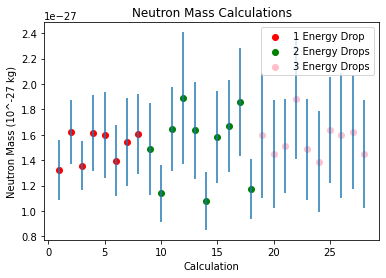

In [ ]:
m_p = 1.6726219 * 10**(-27)
m_e = 9.10938356 * 10**(-31)
# the calculated emission wavelengths of hydrogen from the derived equation above. 
lambda_H_dict = {1:6561.1, 2:4860.1, 3:4339.4}
lambda_H = [lambda_H_dict[drops] for drops in energy_levels_dropped]
lambda_H = np.asarray(lambda_H)
delta_lambda_unc = np.asarray(delta_lambda_unc)
delta_lambda = np.asarray(delta_lambda)

m_n = m_p * m_e * lambda_H / (m_e * lambda_H - m_p * delta_lambda) - m_p
m_n_unc = m_p**2 * m_e * lambda_H / (m_e * lambda_H - m_p * delta_lambda)**2 * delta_lambda_unc

calculation = [i+1 for i in range(len(m_n))]

# Splitting calculated values by number of energy drops so that we can color-code them
calculation_1 = calculation[0:8]
calculation_2 = calculation[8:18]
calculation_3 = calculation[18:28]

m_n_1 = m_n[0:8]
m_n_2 = m_n[8:18]
m_n_3 = m_n[18:28]
plt.scatter(calculation_1, m_n_1, color = "r", label = "1 Energy Drop")
plt.scatter(calculation_2, m_n_2, color = "g", label = "2 Energy Drops")
plt.scatter(calculation_3, m_n_3, color = "pink", label = "3 Energy Drops")
plt.errorbar(calculation, m_n, yerr=m_n_unc, linestyle = '')
plt.legend()

plt.title("Neutron Mass Calculations")
plt.xlabel("Calculation")
plt.ylabel("Neutron Mass (10^-27 kg)")

plt.show()

### Calculating a Weighted Average Value for the Neutron Mass Calculations
To get a best value and uncertainty for the neutron mass calculations we will use the typical method of weighting each value by their uncertainty as shown in the equation below:
 $$m_n = \frac{\sum_i\frac{m_{n_i}}{\sigma_{f}^2}}{\sum_i\frac{1}{\sigma_{m_n}^2}}$$
 With an uncertainty according to the following equation:
 $$\sigma_{m_n} = \left( \sqrt{\sum_i\frac{1}{\sigma_{m_{n_i}}^2}}\right)^{-1}$$

In [ ]:
m_n_weight = (np.sum(m_n/m_n_unc**2))/(np.sum(1/m_n_unc**2))
m_n_weight_unc = (np.sum(1/m_n_unc**2))**-.5

print(f"The weighted average neutron mass is {round(m_n_weight, 28)}kg.")
print(f"The uncertainty in this value is {round(m_n_weight_unc, 28)}kg")

The weighted average neutron mass is 1.4e-27kg.
The uncertainty in this value is 1.0000000000000001e-28kg


The weighted average value of the neutron mass is $$m_n= (1.4\pm0.1)*10^{-27}kg$$

### Calculating a Value for $m_n$, the Neutron Mass using the Spread Method

In [ ]:
m_n_spread = stats.mean(m_n)
m_n_spread_unc = stats.stdev(m_n) / np.sqrt(len(m_n)) 

print(f"The neutrom mass calculated value using the spread method is {round(m_n_spread,29)}kg with an uncertainty in this value of {round(m_n_spread_unc, 29)}kg.")

The neutrom mass calculated value using the spread method is 1.5300000000000001e-27kg with an uncertainty in this value of 4.0000000000000003e-29kg.



The spread calculated value of the neutrom mass is $$m_n= (1.53\pm0.04)*10^{-27}kg$$